# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

----

# 시작 이전에 맛보기 실습을 해볼게요.

## 0. 환경 설정하기

### 1) 구글 드라이브 연결하기

In [3]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2) 경로 확인하기
<font color="red">※ 주의. 경로는 절대 변경하지 마세요.</font>

In [4]:
# ROOT_PATH 확인 
import os

if os.getcwd() == '/content' :
  # 구글 드라이브 사용 시 
  ROOT_PATH = "/content/drive/MyDrive/AIVLE3rd_solution/individual"
else :
  ROOT_PATH = os.path.abspath('..')

# TUTORIAL 데이터 경로
TUTORIAL_PATH = ROOT_PATH + "/tutorial"


### 3) 라이브러리 불러오기
필요시 추가 라이브러리는 설치해서 사용하세요.

In [6]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

---

## 1. 데이터 불러오기
* OpenCV 라이브러리를 활용해서 영상 파일("tutorial.mp4")을 불러오고, 변수명 video에 저장하세요. 
   
    >* 파일경로 TUTORAL_PATH 
    >* 영상 파일의 정보를 확인하세요.(영상의 가로, 세로, 총 프레임 수, fps 정보, 영상 길이)

<font color="green">[실습문제]</font> 1. 파일경로 TUTORIAL_PATH 내 "tutorial.mp4" 파일을 가져오세요. 

In [8]:
video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")

In [9]:
video.isOpened()

True

In [ ]:
# 여기에 입력하세요.
# 1. 파일경로 VIDEO_PATH 내 "tutorial.mp4" 파일을 가져오세요. 
video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")

In [ ]:
video.isOpened()

True

<font color="green">[실습문제]</font> 2. 영상 파일의 정보를 확인하세요.
> 영상의 파일 이름, 영상의 가로, 세로, 총 프레임 수, FPS 정보, 영상 길이

In [11]:
video.get(cv2.CAP_PROP_FRAME_WIDTH)
video.get(cv2.CAP_PROP_FRAME_HEIGHT)

360.0

In [12]:
video.get(cv2.CAP_PROP_FPS)

24.0

In [13]:
video.get(cv2.CAP_PROP_FRAME_COUNT)

3288.0

In [14]:
# 2. 영상 파일의 정보를 확인하세요.
## 영상의 파일 이름, 영상의 가로, 세로, 총 프레임 수, FPS 정보, 영상 길이
video_width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
video_height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
video_length = video.get(cv2.CAP_PROP_FRAME_COUNT)
video_fps = video.get(cv2.CAP_PROP_FPS)

print("가로 :", video_width)
print("세로 :", video_height)
print("총 프레임 수 :", video_length)
print("FPS :", video_fps)
print("영상 길이 : %d 초 " %round(video_length/video_fps))

video.release()

가로 : 640.0
세로 : 360.0
총 프레임 수 : 3288.0
FPS : 24.0
영상 길이 : 137 초 


In [16]:
video.isOpened()

False

## 2. 동영상 프레임 단위로 나눠 이미지 저장하기
* OpenCV 라이브러리를 활용해서 "tutorial.mp4" 파일을 프레임 단위로 잘라내고 저장하세요.   
    * 저장경로 : TUTORIAL_IMAGE : TUTORIAL_PATH + "/image"
    * 파일명 : 1.jpg, 2.jpg, 3.jpg ... 

<font color="green">[실습문제]</font> 3. "tutorial.mp4" 파일을 프레임 단위로 자르고 자른 이미지를 TUTORIAL_IMAGE 경로에 저장하세요.

In [17]:
TUTORIAL_IMAGE = TUTORIAL_PATH + "/image"

In [20]:
video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")

if not os.path.exists(TUTORIAL_IMAGE):
  os.mkdir(TUTORIAL_IMAGE)

count = 0
while video.isOpened():
  ret, frame = video.read()
  if ret:
    filename = TUTORIAL_IMAGE + "/" + str(count) + ".jpg"
    cv2.imwrite(filename, frame)
  else:
    break
  count += 1

video.release()


In [21]:
cv2.CAP_PROP_POS_MSEC

0

In [ ]:
cv2.CAP_PROP_POS_MSEC # 밀리세컨즈 불러올 수 있다. 해당 프레임 몇초 구간

In [22]:
# solution 2
TUTORIAL_IMAGE = TUTORIAL_PATH + "/image2"

TIME_MEASUERMENT_UNIT = 5 #TIME MEASUREMENT UNIT을 통해 몇 초 단위로 이미지를 저장할 지 선택

if not os.path.exists(TUTORIAL_IMAGE):
  os.mkdir(TUTORIAL_IMAGE)

video = cv2.VideoCapture(TUTORIAL_PATH + "/tutorial.mp4")

while video.isOpened():
  ret,frame = video.read()
  if ret:
    # 현재 프레임 위치 (msec) 
    frame_sec = video.get(cv2.CAP_PROP_POS_MSEC)/1000
    if frame_sec.is_integer():
      if (frame_sec % TIME_MEASUERMENT_UNIT == 0):
        filename = TUTORIAL_IMAGE + "/" + str(round(frame_sec)) + ".jpg"
        cv2.imwrite(filename, frame) 
  else:
    break

video.release()

<font color="green">[실습문제]</font> 4. 프레임으로 자른 이미지를 열어보세요. 

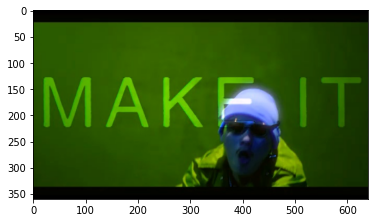

In [23]:
image = cv2.imread(TUTORIAL_IMAGE + '/100.jpg')
plt.imshow(image)


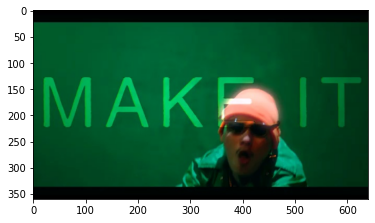

In [25]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

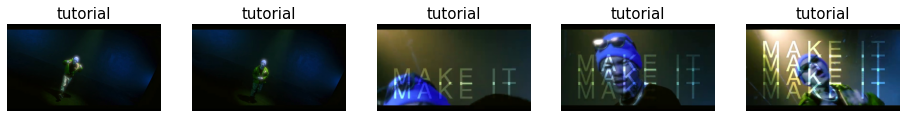

In [ ]:
# 실습해보세요
img_list = glob.glob(TUTORILA_IMAGE + "/*.jpg")
fig, axes = plt.subplots(1, 5,figsize=(16, 9))

for i in range(5):
  original_image = cv2.imread(img_list[i])
  rgb_image = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
  axes[i].imshow(original_image)
  axes[i].set_title("tutorial" , fontsize=15)    
  axes[i].axis('off')
  
plt.show()